# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Alfatih
- **Email:** alfatih2003@gmail.com
- **ID Dicoding:** inifatih

## Menentukan Pertanyaan Bisnis

1. Bagaimana tingkat kepuasan pelanggan berdasarkan skor yang diberikan? Apa strategi yang dapat dilakukan untuk meningkatkannya?
2. Bagaimana cara menerapkan strategi yang tepat untuk meningkatkan penjualan dengan memanfaatkan metode pembayaran?
3. Bagaimana performa penjualan produk pada setiap bulan?
4. Bagaimana strategi yang tepat untuk meningkatkan performa penjualan e-commerce berdasarkan segmentasi pelanggan?

## Import Semua Packages/Library yang Digunakan

In [5]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

## Data Wrangling

### Gathering Data

Kumpulkan data yang kita perlukan untuk analisis.

In [6]:
# Collect the dataset we need
order_payments_df = pd.read_csv("data\order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data\order_reviews_dataset.csv")
orders_df = pd.read_csv("data\orders_dataset.csv")
order_items_df = pd.read_csv("data\order_items_dataset.csv")

# Merge dataset orders_df with order_items_df 
rfm_df = pd.merge(orders_df, order_items_df, on='order_id', how='left')

# Drop Kolom yang tidak dibutuhkan
drop_columns = ['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'freight_value']
rfm_df = rfm_df.drop(drop_columns, axis=1)
print(rfm_df.head(5))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_purchase_timestamp  order_item_id                        product_id  \
0      2017-10-02 10:56:33            1.0  87285b34884572647811a353c7ac498a   
1      2018-07-24 20:41:37            1.0  595fac2a385ac33a80bd5114aec74eb8   
2      2018-08-08 08:38:49            1.0  aa4383b373c6aca5d8797843e5594415   
3      2017-11-18 19:28:06            1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4      2018-02-13 21:18:39            1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id   price  
0  3504c0cb71d7fa48d967e0e4c94d59d9   29

### Assessing Data

Pada langkah ini, dilakukan assessing pada data untuk menilai data yang akan diolah setelah dikumpulkan di tahap gathering data.

Termasuk dengan mencari apakah terdapat kekurangan dari data seperti adanya nilai kosong (Missing Value).

In [7]:
# Cek missing value
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_payments_df tidak memiliki missing value.

In [8]:
# Cek missing value
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

order_reviews_df memiliki missing value pada feature review_comment_title dan review_comment_message.

In [9]:
rfm_df.isnull().sum()

order_id                      0
customer_id                   0
order_purchase_timestamp      0
order_item_id               775
product_id                  775
seller_id                   775
price                       775
dtype: int64

rfm_df memiliki missing value pada beberapa feature/column nya.

### Cleaning Data

Ditemukan missing value pada order_reviews_df tepatnya pada feature review_comment_title dan review_comment_message. Akan tetapi, karena value pada feature tersebut tidak mempengaruhi tujuan maka dapat diatasi dengan menghapusnya.

In [10]:
# Mengatasi Missing Value pada order_reviews_df dengan menghapusnya
order_reviews_df = order_reviews_df.dropna()
print("Missing Value: ")
print(order_reviews_df.isnull().sum())

Missing Value: 
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


Data order_payments_df tidak dilakukan cleaning missing value karena pada feature yang digunakan tidak terdapat missing value.

Penanganan missing value pada rfm_df dilakukan dengan menghapusnya karena berupa id yang sifatnya unik dan tidak dapat diganti.

In [11]:
rfm_df = rfm_df.dropna()
print("Missing Value: ")
print(rfm_df.isnull().sum())

Missing Value: 
order_id                    0
customer_id                 0
order_purchase_timestamp    0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

1. Eksplorasi terhadap data order_reviews_df untuk mencari informasi dari review sebuah produk terhadap kepuasan pelanggan melalui review yang telah mereka berikan.

In [12]:
review_score= order_reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)
print("Jumlah Score Berdasarkan Bintang 1-5: \n", review_score)

Jumlah Score Berdasarkan Bintang 1-5: 
 review_score
5    5416
1    1789
4    1433
3     737
2     458
Name: order_id, dtype: int64


In [13]:
review_comment = order_reviews_df.groupby(by="review_score").review_comment_message.nunique().sort_values(ascending=False)
print("Jumlah Comment Message yang Diberikan pada Setiap Review Score: \n", review_comment)

Jumlah Comment Message yang Diberikan pada Setiap Review Score: 
 review_score
5    4887
1    1757
4    1349
3     716
2     451
Name: review_comment_message, dtype: int64


- Ditemukan skor terbanyak adalah sangat puas(5), tetapi skor kedua terbanyak adalah sangat tidak puas(1).
- Jumlah komentar yang diberikan juga memiliki urutan yang sama seperti pemberikan skor dan memiliki angka selisih yang tidak terlalu berbeda jauh.

2. Eksplorasi terhadap data order_payments_df untuk mencari informasi mengenai metode pembayaran.

In [14]:
payment_counts = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
payment_counts

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

- Ditemukan bahwa pelanggan paling banyak melakukan transaksi pada e-commerce menggunakan credit card.

3. Eksplorasi terhadap data_rfm untuk mengetahui performa penjualan e-commerce pada setiap bulan

In [15]:
# Mencari tren dari total order pada setiap bulan
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

rfm_df['month'] = rfm_df['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = rfm_df.groupby('month').size()

Melalui syntax di atas, performa penjualan e-commerce dapat diketahui melalui jumlah transaksi setiap order berdasarkan waktunya yang dikelompokkan berdasarkan bulan.

4. Eksplorasi terhadap data rfm_df untuk menganalisa RFM(Recency, Frequency, dan Monetary).
Analisis RFM, yaitu Recency, Frequency, dan Monetary.
- Untuk Recency, akan dilakukan analisis terhadap jumlah transaksi selama beberapa bulan terakhir.
- Untuk Frequency, akan dilakukan analisis terhadap berapa banyak jumlah transaksi yang dilakukan oleh pelanggan melalui e-commerce.
- Untuk Monetary, akan dilakukan analisis terhadap pengeluaran oleh pelanggan.

In [16]:
# recency
latest_purchase_date = pd.to_datetime(rfm_df['order_purchase_timestamp']).max()
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])
recency_df = rfm_df.groupby('customer_id').order_purchase_timestamp.max().reset_index()
recency_df['recency'] = (latest_purchase_date - recency_df['order_purchase_timestamp']).dt.days

# frequency
frequency_df = rfm_df.groupby('customer_id').order_id.count().reset_index()
frequency_df.columns = ['customer_id', 'frequency']

# monetary
monetary_df = rfm_df.groupby('customer_id').price.sum().reset_index()
monetary_df.columns = ['customer_id', 'monetary']

# Merge data Recency, Frequency, dan Monetary
rfm_merged_df = pd.merge(recency_df, frequency_df, on='customer_id')
rfm_merged_df = pd.merge(rfm_merged_df, monetary_df, on='customer_id')

print(rfm_merged_df)


                            customer_id order_purchase_timestamp  recency  \
0      00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26      292   
1      000161a058600d5901f007fab4c27140      2017-07-16 09:40:32      413   
2      0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43      551   
3      0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20      382   
4      000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17      153   
...                                 ...                      ...      ...   
98661  fffcb937e9dd47a13f05ecb8290f4d3e      2018-03-17 00:55:27      170   
98662  fffecc9f79fd8c764f843e9951b11341      2018-03-29 16:59:26      157   
98663  fffeda5b6d849fbd39689bb92087f431      2018-05-22 13:36:02      103   
98664  ffff42319e9b2d713724ae527742af25      2018-06-13 16:57:05       81   
98665  ffffa3172527f765de70084a7e53aae8      2017-09-02 11:53:32      365   

       frequency  monetary  
0              1     89.80  
1              1 

Melalui syntax di atas, dibuat data frame yang sesuai dengan tujuan untuk menganalisis RFM dengan menambahkan kolom baru bernama 'Recency', 'Frequency', dan 'Monetary'.

In [17]:
# Clustering K-Means
# Lakukan Scaling pada data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_merged_df[['recency', 'frequency', 'monetary']])

# Tentukan jumlah cluster
n_clusters = 3

# Cluster menggunakan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

# add kolom cluster ke dalam data rfm
rfm_merged_df['cluster'] = clusters

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Lakukan clustering untuk melihat segmentasi pelanggan

Simpan dataset yang sudah bersih untuk membuat dashboard melalui streamlit.

In [18]:
# Simpan dataset untuk membuat dashboard pada streamlit
# order_reviews_df.to_csv("order_reviews.csv", index=False)
# order_payments_df.to_csv("order_payments.csv", index=False)
# rfm_df.to_csv("rfm_df.csv", index=False)
# rfm_merged_df.to_csv("rfm_merged_df.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat kepuasan pelanggan berdasarkan rating yang diberikan? Apa strategi yang dapat dilakukan untuk meningkatkannya?

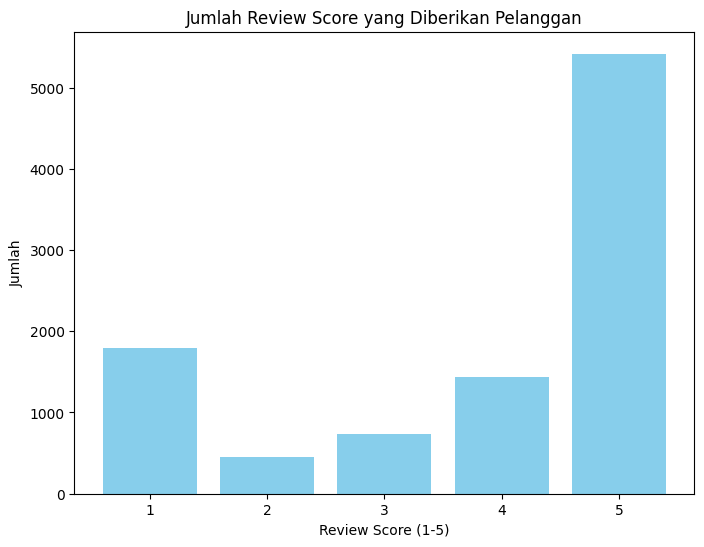

In [19]:
# Membuat Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(review_score.index, review_score, color='skyblue')

plt.xlabel('Review Score (1-5)')
plt.ylabel('Jumlah')
plt.title('Jumlah Review Score yang Diberikan Pelanggan')
plt.show()

Hasil visualisasi Bar Chart tersebut menunjukkan bahwa mayoritas pelanggan sudah merasa puas dalam pembeliannya. Akan tetapi, terdapat juga yang tidak merasa puas dengan memberikan skor 1 bintang saja. Selain itu, skor ini berada di urutan kedua terbanyak, yang artinya masih banyak pelanggan yang tidak puas terhadap pengalaman belanja. Oleh karena itu, ini dapat menjadi catatan perusahaan untuk merespon skor tersebut dengan beberapa kebijakan yang sesuai dengan komplain atau saran dari pelanggan.

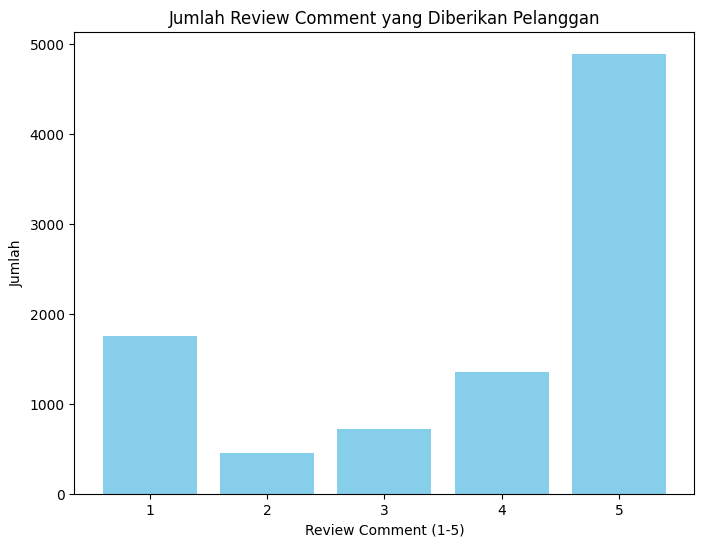

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(review_comment.index, review_comment, color='skyblue')

plt.xlabel('Review Comment (1-5)')
plt.ylabel('Jumlah')
plt.title('Jumlah Review Comment yang Diberikan Pelanggan')
plt.show()

Berdasarkan visualisasi jumlah review comment yang diberikan pelanggan, terdapat bentuk grafik yang hampir mirip dengan jumlah skor yang diberikan pada visualisasi sebelumnya. Hal ini menunjukkan kemungkinan bahwa pengguna yang memberikan skor cenderung memberikan komentar pada penilaiannya. Komentar pada penilaian sendiri dapat membantu pelaku usaha untuk mengetahui masukan dari pelanggan secara detil dan kemudian dapat meningkatkan kepuasan pelanggan.

Korelasi Matrix dari Feature review_score dengan review_comment: 

                         order_id  review_comment_message
order_id                1.000000                0.999642
review_comment_message  0.999642                1.000000


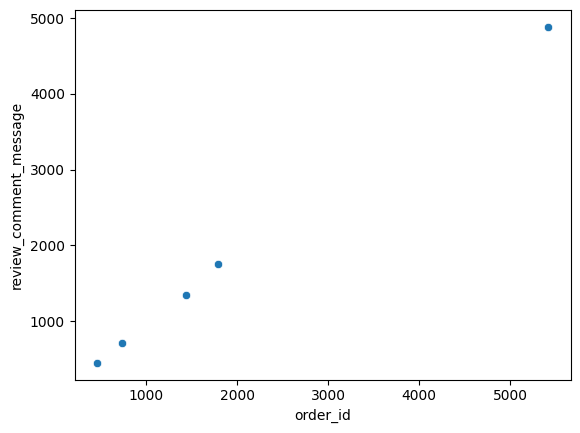

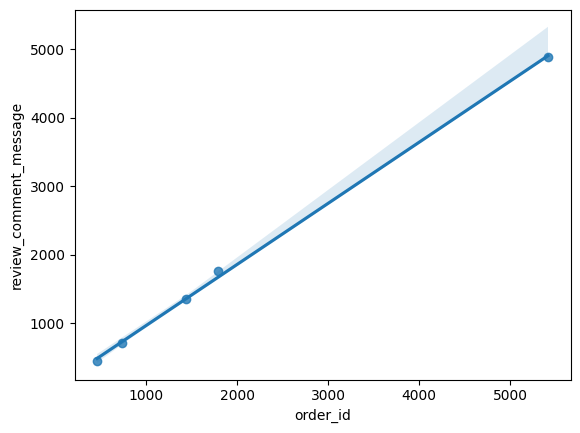

In [21]:
df_corr_review = pd.concat([review_score, review_comment], axis=1)
print("Korelasi Matrix dari Feature review_score dengan review_comment: \n\n", df_corr_review.corr())
sns.scatterplot(x=review_score, y=review_comment)
plt.show()
sns.regplot(x=review_score, y=review_comment)
plt.show()

Visualisasi Scatter Plot dari review_comment dan review_score menunjukkan bahwa terdapat korelasi antara keduanya. Dilihat dari nilai korelasi matrix yang mendekati nilai 1 dan garis korelasi pada Scatter plot yang membentuk pita kecil menandakan tingkat confidence level yang tinggi.

Artinya, pengguna yang memberikan skor terhadap suatu barang cenderung menambahkan pesan komentar pada penilaiannya. Ini merupakan suatu hal yang positif bagi pelaku usaha di e-commerce untuk melakukan evaluasi kedepannya. Komentar spesifik yang diberikan oleh pelanggan akan membantu pelaku usaha dalam mengambil keputusan mengenai produknya, apakah sudah sesuai dan dipertahankan saja atau perlu dilakukan perubahan. 

### Pertanyaan 2: Bagaimana cara menerapkan strategi yang tepat untuk meningkatkan penjualan dengan memanfaatkan metode pembayaran?

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

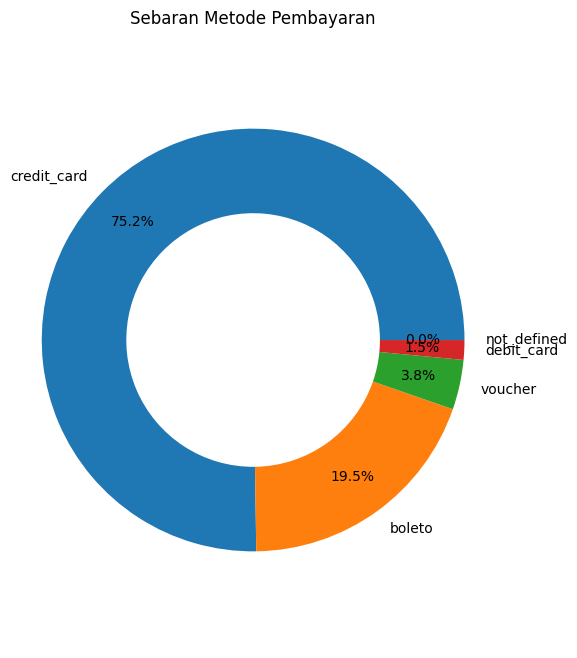

In [22]:
# Menampilkan pie chart pembagian tipe pembayaran
print(payment_counts)
plt.figure(figsize=(6,8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', pctdistance=0.8, wedgeprops={'width': 0.4})
plt.title('Sebaran Metode Pembayaran')
plt.axis('equal')
plt.show

Dengan melihat visualisasi pie chart di atas, terlihat bahwa terdapat sebaran data yang cukup jauh antara pembayaran menggunakan Credit Card dengan metode pembayaran lain seperti Boleto, Voucher, Debit Card, dan lainnya. Credit Card meliputi 75.2% dengan jumlah total sebanyak 76505 dari seluruh pembayaran diikuti oleh Boleto dengan 19.5% dengan jumlah total 19784, Voucher 3.8% dengan jumlah total 3866, Debit Card 1.5% dengan jumlah total 1528, dan Not defined atau yang tidak terdefinisi sebanyak 0.0% dengan jumlah total 3 saja. Berdasarkan visualisasi tersebut, perusahaan dapat mengambil langkah strategis untuk menerapkan kebijakan yang dapat menarik banyaknya pengguna Credit Card. Dengan memberikan tawaran yang menarik kepada pengguna Credit Card, perusahaan dapat meningkatkan penjualan dari 2 sumber sekaligus, baik dari pengguna baru sekaligus pengguna setia Credit Card.

### Pertanyaan 3: Bagaimana performa penjualan produk pada setiap bulan?

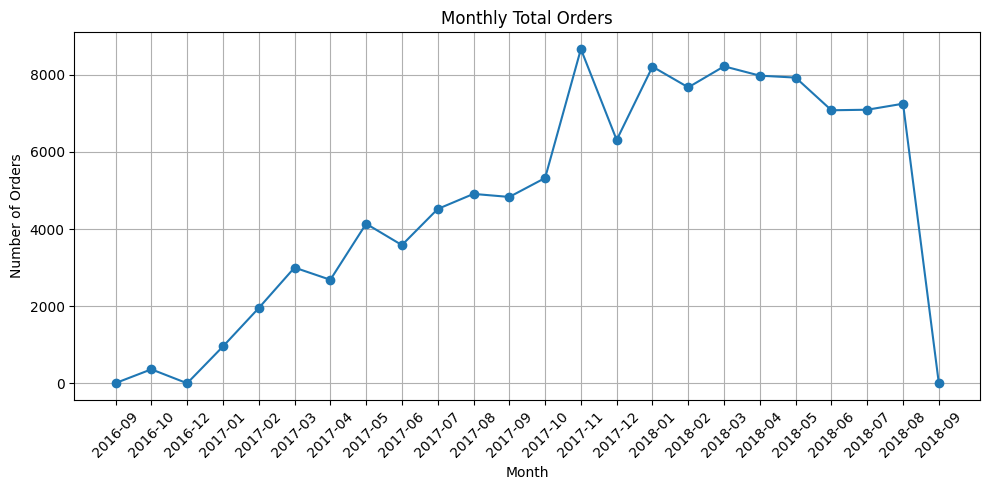

In [23]:
# Menampilkan line chart performa penjualan setiap bulan
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o', linestyle='-')
ax.set_title("Monthly Total Orders")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan line chart di atas, terlihat bahwa total penjualan mengalami peningkatan drastis mulai bulan januari 2017 sampai November 2017. Total penjualan mengalami penurunan cukup drastis pada November 2017. Akan tetapi, penjualan kembali meningkat mulai Desember 2017 sampai Januari 2018. Mulai Januari 2018, total penjualan mengalami penurunan yang signifikan. Namun, pada bulan Juli 2018 total penjualan mengalami penurunan sangat drastis hingga sekarang. 

### Pertanyaan 4: Bagaimana strategi yang tepat untuk meningkatkan performa penjualan e-commerce berdasarkan segmentasi pelanggan?

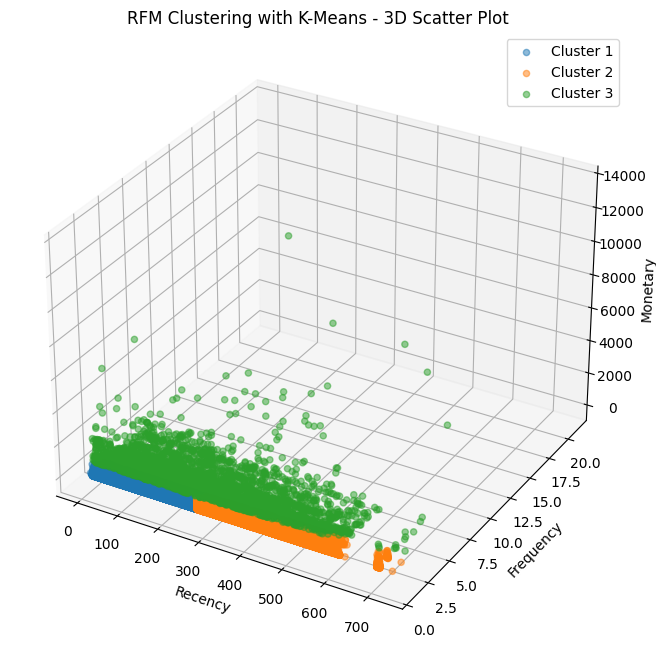

In [24]:
# Menampilkan hasil analisis RFM
# Visualisasi hasil clustering dengan scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    cluster_data = rfm_merged_df[rfm_merged_df['cluster'] == cluster]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], alpha=0.5, label=f'Cluster {cluster + 1}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM Clustering with K-Means - 3D Scatter Plot')
plt.legend()
plt.show()

Scatterplot di atas merupakan visualisasi sebaran kelompok pelanggan. Pelanggan di E-Commerce dibagi menjadi 3 segmen berdasarkan RFMnya sebagai berikut:

- Cluster 1 memiliki nilai RFM yang rendah, menunjukkan bahwa pelanggan dalam cluster ini cenderung jarang melakukan pembelian, mengeluarkan jumlah uang yang lebih sedikit, dan pembelian terakhir mereka cukup lama.
- Cluster 2 memiliki nilai RFM sedang, dengan recency dan frequency yang lebih tinggi dibandingkan dengan cluster 1. Namun, mereka masih memiliki nilai monetary yang lebih rendah dibandingkan dengan cluster 3.
- Cluster 3 memiliki nilai RFM yang tinggi, menunjukkan bahwa pelanggan dalam cluster ini sangat aktif dalam melakukan pembelian, mengeluarkan jumlah uang yang tinggi, dan sering melakukan pembelian baru-baru ini.

Scatterplot menunjukkan cluster 2 memiliki karakteristik yang mirip dengan cluster 1, tetapi lebih aktif dalam melakukan pembelian dengan nilai recency dan frequency yang lebih tinggi. Sedangkan, cluster 3 memiliki karakteristik yang berbeda dari cluster 1 dan cluster 2, dengan nilai order yang lebih tinggi dan lebih sering melakukan pembelian, serta memiliki nilai monetary yang paling tinggi.

Strategi yang disarankan untuk e-commerce adalah dengan meningkatkan kenyamanan pelanggan cluster 3 dengan menawarkan layanan yang lebih baik dan mendalaminya karena pelanggan dalam cluster ini cenderung menjadi pelanggan yang paling loyal.Lalu, memperbanyak produk dengan harga menengah ke bawah untuk menarik perhatian pelanggan dalam cluster 1 dan cluster 2, sehingga mereka lebih sering bertransaksi di E-Commerce.

## Conclusion

- Conlusion pertanyaan 1

Review Score terbanyak yang diberikan oleh pelanggan adalah '5', artinya mayoritas pelanggan sudah puas dengan transaksinya di E-Commerce. Namun, review ini diikuti dengan skor '1' pada urutan kedua. Skor yang menunjukkan ketidakpuasan pelanggan ini harus menjadi perhatian khusus bagi pelaku usaha di E-Commerce karena jumlahnya yang tinggi. Selain skor, pelanggan juga cenderung memberikan komentar pada setiap ulasan yang mereka berikan. Oleh karena itu, strategi yang dapat dilakukan untuk meningkatkan kepuasan pelanggan salah satunya adalah evaluasi dengan melihat pendapat, saran, dan argumen lainnya pada komentar yang diberikan oleh pelanggan pada setiap ulasan. Dengan begitu, pelaku usaha dapat mengetahui secara detil masalah yang pelanggan alami.

- Conclusion pertanyaan 2

Banyaknya pengguna Credit Card dapat dimanfaatkan perusahaan untuk mengambil langkah strategis dengan menerapkan kebijakan yang dapat menarik banyaknya pengguna Credit Card. Dengan memberikan tawaran yang menarik kepada pengguna Credit Card, perusahaan dapat meningkatkan penjualan dari 2 sumber sekaligus, baik dari pengguna baru sekaligus pengguna setia Credit Card. Langkah seperti memberikan promo atau diskon dengan menggunakan metode pembayaran Credit Card dapat menjadi strategi yang baik. Selain itu, dengan memberikan informasi terkait perusahan kepada pengguna Credit Card dapat mempertahankan jumlah pelanggan untuk merasa selalu dekat dengan perusahaan melakukan transaksi kembali. 

- Conclusion pertanyaan 3

Total penjualan yang diamati berdasarkan total pemesanan pada E-Commerce setiap bulan menunjukkan performa yang baik karena terdapat peningkatan signifikan mulai dari bulan Januari 2017. Namun, pada beberapa bulan terakhir tepatnya di bulan Januari 2018, total penjualan mengalami penurunan signifikan. Selain itu, terdapat penurunan yang drastis pada bulan Juli 2018 hingga sekarang. Oleh karena itu, perlu segera dilakukan evaluasi untuk menemukan cara agar performa total penjualan dapat kembali stabil seperti tahun lalu dan tidak terus menurun seperti saat ini. Terdapat beberapa kemungkinan yang mempengaruhi seperti adanya perubahan di dalam sistem E-Commerce yang mengganggu penjualan, perubahan kebijakan pemerintah, munculnya kompetitor, penurunan kualitas barang dari pelaku usaha di E-Commerce, dan lainnya.

- Conclusion pertanyaan 4

Hasil analisis RFM menunjukkan segmentasi pelanggan sebagai berikut:

- Cluster 1: Jarang berbelanja, pengeluaran rendah, dan lama tidak berbelanja.
- Cluster 2: Berbelanja lebih sering dengan pengeluaran sedang, namun nilai order lebih rendah dibandingkan dengan cluster 3.
- Cluster 3: Aktif berbelanja, pengeluaran tinggi, dan sering berbelanja baru.

Cluster 2 mirip dengan cluster 1 tetapi lebih aktif dalam berbelanja, sementara cluster 3 memiliki karakteristik berbeda dengan nilai order, frekuensi, dan pengeluaran yang lebih tinggi. Oleh karena itu, berdasarkan hasil analisis ini, strategi yang disarankan untuk E-Commerce adalah meningkatkan layanan bagi pelanggan cluster 3 untuk mempertahankan loyalitas, dan memperluas pilihan produk dengan harga menengah ke bawah untuk menarik pelanggan cluster 1 dan 2 agar lebih sering berbelanja.